# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#test calls to confirm I am getting random cities from all lat_lngs
print(city, lat_lng)

atasu (49.63322697349514, 70.89262364173308)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#request variables

url = "http://api.openweathermap.org/data/2.5/weather?"

#empty lists to store information that I need for dataframe and plots
city = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

n = 1

In [4]:
#test call to check format of json return

testcall = requests.get("http://api.openweathermap.org/data/2.5/weather?q=toronto&units=metric&appid=a1349063ee99a929865315ed0494d173").json()
print(testcall)

{'coord': {'lon': -79.42, 'lat': 43.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -0.5, 'feels_like': -6.24, 'temp_min': -2.22, 'temp_max': 1.11, 'pressure': 1027, 'humidity': 58}, 'visibility': 14484, 'wind': {'speed': 4.1, 'deg': 110}, 'clouds': {'all': 1}, 'dt': 1581971474, 'sys': {'type': 1, 'id': 941, 'country': 'CA', 'sunrise': 1581941660, 'sunset': 1581979763}, 'timezone': -18000, 'id': 6167865, 'name': 'Toronto', 'cod': 200}


In [5]:
#complete weather check and print log of each city as it is being processed

print("Beginning Data Retrieval")
print("------------------------")

for i in cities:
    try:
        #completing the call
        response = requests.get(f"{url}q={i}&units=metric&appid={api_key}").json()
        
        #append parts of responses needed to fill out dataframe
        city.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        city_name = response["name"]
        country_name = response["sys"]["country"]
        
        n=+1
        print(f"Processing City: {i}")
    except:
        print("City not found. Skipping...")
    continue
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing City: narsaq
Processing City: namatanai
Processing City: jamestown
Processing City: kuah
Processing City: new norfolk
Processing City: butaritari
City not found. Skipping...
Processing City: leningradskiy
Processing City: souillac
Processing City: tenenkou
Processing City: oktyabrskoye
Processing City: shingu
Processing City: ribeira grande
Processing City: port macquarie
Processing City: lebu
Processing City: umm kaddadah
Processing City: yellowknife
Processing City: isangel
Processing City: albany
Processing City: fairbanks
Processing City: avera
Processing City: atuona
Processing City: alice springs
Processing City: olinda
City not found. Skipping...
Processing City: tuktoyaktuk
Processing City: nanzhou
Processing City: carnarvon
Processing City: kalmunai
Processing City: karakol
Processing City: mariental
City not found. Skipping...
Processing City: guerrero negro
Processing City: alofi
Processing City: luderitz
City not 

Processing City: mombetsu
Processing City: niono
Processing City: chimore
Processing City: roald
Processing City: yilan
Processing City: sonoita
City not found. Skipping...
Processing City: shimoda
Processing City: dalvik
Processing City: port augusta
Processing City: college
Processing City: pevek
Processing City: kavaratti
Processing City: flin flon
Processing City: pangai
Processing City: durres
Processing City: kieta
City not found. Skipping...
Processing City: ordu
Processing City: gananoque
Processing City: vaitape
Processing City: peleduy
Processing City: kropotkin
City not found. Skipping...
Processing City: dingle
Processing City: ilulissat
Processing City: chapais
Processing City: saint anthony
Processing City: sumbe
Processing City: pampierstad
Processing City: hami
Processing City: thinadhoo
Processing City: alyangula
Processing City: vladeni
Processing City: big rapids
Processing City: sinop
City not found. Skipping...
Processing City: northam
Processing City: talcahuano
P

Processing City: hasaki
Processing City: yakeshi
Processing City: alekseyevskaya
Processing City: husavik
Processing City: berezovyy
Processing City: chivay
Processing City: santa maria
Processing City: saint george
Processing City: ocean city
Processing City: kurilsk
City not found. Skipping...
Processing City: taicheng
Processing City: pareora
City not found. Skipping...
Processing City: hay river
Processing City: llanes
Processing City: vitim
Processing City: vyara
Processing City: north bend
Processing City: bosanska kostajnica
Processing City: mayo
Processing City: barra patuca
Processing City: leon
Processing City: meadow lake
City not found. Skipping...
Processing City: atasu
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#count data to make sure I am the same amount of values for each variable list

print(f"City: {len(city)}")
print(f"Country: {len(country)}")
print(f"Latitude: {len(latitude)}")
print(f"Longitude: {len(longitude)}")
print(f"Cloudiness: {len(cloudiness)}")
print(f"Humidity: {len(humidity)}")
print(f"Maximum Temperature: {len(max_temp)}")
print(f"Wind Speed: {len(wind_speed)}")
print(f"Date: {len(date)}")

City: 594
Country: 594
Latitude: 594
Longitude: 594
Cloudiness: 594
Humidity: 594
Maximum Temperature: 594
Wind Speed: 594
Date: 594


In [7]:
#create a dataframe
city_data = pd.DataFrame({"City": city,
                          "Country": country,
                          "Latitude": latitude,
                          "Longitude": longitude,
                          "Cloudiness": cloudiness,
                          "Humidity": humidity,
                          "Max_Temp": max_temp,
                          "Wind_Speed": wind_speed,
                          "Date": date})

#display the dataframe
city_data.head()

,City,Country,Latitude,Longitude,Cloudiness,Humidity,Max_Temp,Wind_Speed,Date
0,Narsaq,GL,60.92,-46.05,75,51,-10.00,1.00,1581972112
1,Namatanai,PG,-3.67,152.43,100,83,27.69,7.35,1581972168
2,Jamestown,US,42.10,-79.24,1,47,6.67,0.93,1581971991
3,Kuah,MY,6.33,99.84,20,78,28.00,2.10,1581972168
4,New Norfolk,AU,-42.78,147.06,20,81,11.11,2.60,1581972168


In [9]:
#convert timestamp to datetime format

dates = city_data["Date"].unique()
# print(dates)
access_date = []

readabletrial = dt.datetime.fromtimestamp(1581893644).isoformat()
print(readabletrial)
      
for i in dates:
    try:
        readable = dt.datetime.fromtimestamp(i).isoformat()
        access_date.append(readable)
        print(f"Processing {i}: {readable}")
        n=+1
    except:
        print(error)
        continue

2020-02-16T17:54:04
Processing 1581972112: 2020-02-17T15:41:52
Processing 1581972168: 2020-02-17T15:42:48
Processing 1581971991: 2020-02-17T15:39:51
Processing 1581972106: 2020-02-17T15:41:46
Processing 1581972153: 2020-02-17T15:42:33
Processing 1581972107: 2020-02-17T15:41:47
Processing 1581972169: 2020-02-17T15:42:49
Processing 1581972117: 2020-02-17T15:41:57
Processing 1581972120: 2020-02-17T15:42:00
Processing 1581972111: 2020-02-17T15:41:51
Processing 1581972018: 2020-02-17T15:40:18
Processing 1581972116: 2020-02-17T15:41:56
Processing 1581972007: 2020-02-17T15:40:07
Processing 1581972033: 2020-02-17T15:40:33
Processing 1581972170: 2020-02-17T15:42:50
Processing 1581971859: 2020-02-17T15:37:39
Processing 1581972103: 2020-02-17T15:41:43
Processing 1581972171: 2020-02-17T15:42:51
Processing 1581972128: 2020-02-17T15:42:08
Processing 1581972109: 2020-02-17T15:41:49
Processing 1581972119: 2020-02-17T15:41:59
Processing 1581972172: 2020-02-17T15:42:52
Processing 1581972130: 2020-02-17T

In [10]:
print(access_date)

['2020-02-17T15:41:52', '2020-02-17T15:42:48', '2020-02-17T15:39:51', '2020-02-17T15:41:46', '2020-02-17T15:42:33', '2020-02-17T15:41:47', '2020-02-17T15:42:49', '2020-02-17T15:41:57', '2020-02-17T15:42:00', '2020-02-17T15:41:51', '2020-02-17T15:40:18', '2020-02-17T15:41:56', '2020-02-17T15:40:07', '2020-02-17T15:40:33', '2020-02-17T15:42:50', '2020-02-17T15:37:39', '2020-02-17T15:41:43', '2020-02-17T15:42:51', '2020-02-17T15:42:08', '2020-02-17T15:41:49', '2020-02-17T15:41:59', '2020-02-17T15:42:52', '2020-02-17T15:42:10', '2020-02-17T15:41:38', '2020-02-17T15:42:27', '2020-02-17T15:41:44', '2020-02-17T15:42:53', '2020-02-17T15:42:32', '2020-02-17T15:41:48', '2020-02-17T15:42:54', '2020-02-17T15:41:27', '2020-02-17T15:41:42', '2020-02-17T15:42:41', '2020-02-17T15:42:55', '2020-02-17T15:38:23', '2020-02-17T15:42:56', '2020-02-17T15:41:50', '2020-02-17T15:42:57', '2020-02-17T15:42:29', '2020-02-17T15:38:43', '2020-02-17T15:37:50', '2020-02-17T15:42:06', '2020-02-17T15:42:03', '2020-02-1

In [11]:
#export the city data into a .csv
city_data.to_csv('city_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

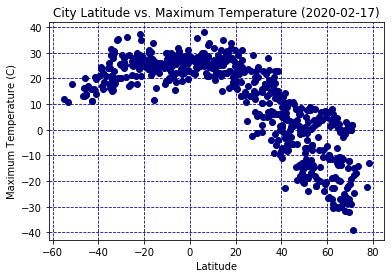

In [12]:
#form scatter plot
plt.scatter(city_data["Latitude"], city_data["Max_Temp"], facecolors="navy")

#formatting
plt.title("City Latitude vs. Maximum Temperature (2020-02-17)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.grid(linestyle="--", color="navy")

#save plot as image
plt.savefig("Latitude_vs_MaxTemp.png")

#### Latitude vs. Humidity Plot

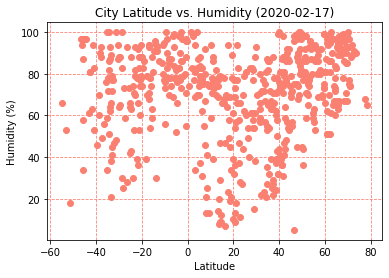

In [13]:
#line to form scatter plot
plt.scatter(city_data["Latitude"], city_data["Humidity"], facecolors="salmon")

#formatting
plt.title("City Latitude vs. Humidity (2020-02-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="--", color="salmon")

#save plot as image
plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

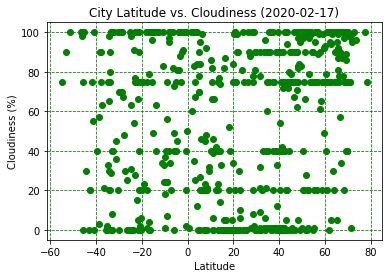

In [14]:
#line to form scatter plot
plt.scatter(city_data["Latitude"], city_data["Cloudiness"], facecolors="green")

#formatting
plt.title("City Latitude vs. Cloudiness (2020-02-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="--", color="green")

#save plot as image
plt.savefig("Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

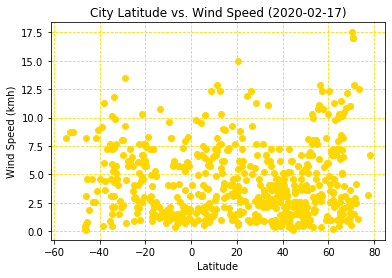

In [15]:
#line to form scatter plot
plt.scatter(city_data["Latitude"], city_data["Wind_Speed"], facecolors="gold")

#formatting
plt.title("City Latitude vs. Wind Speed (2020-02-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmh)")
plt.grid(linestyle="--", color="gold")

#save plot as image
plt.savefig("Latitude_vs_WindSpeed.png")